<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/Making_the_Most_of_your_Colab_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



# Access Popular LLMs via Google-Colab-AI Without an API Key

Users with Colab's paid plans have free access to most popular LLMs via google-colab-ai Python library. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).

In [ ]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)

## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

# Define parameters for simulation
def generate_dataset(num_samples=2000):
    features = []
    for _ in range(num_samples):
        eta = np.random.uniform(-10, 20)  # SNR in dB
        phi_T = np.random.uniform(0, 2 * np.pi)
        r_T = np.random.uniform(0, 1)
        q_T = np.random.uniform(0, 1)
        m_ST = 2.5  # Nakagami-m parameter
        m_tD = 2.5
        zeta_c = 2.5
        N = 30  # Use a fixed number for beamforming elements
        delta_ST = 1
        delta_tD = 1
        A_th = 5

        # Calculate distance and channel effects
        x_T = r_T * np.sin(phi_T)
        y_T = r_T * np.cos(phi_T)
        z_T = q_T
        x_a, y_a, z_a = -0.5, 0, 0
        x_b, y_b, z_b = 0.5, 0, 0
        distance = np.sqrt((x_a - x_T)**2 + (y_a - y_T)**2 + (z_a - z_T)**2)

        h_Nakagami = np.random.gamma(m_ST, 1.0/m_ST)  # Nakagami fading
        h_Rayleigh = np.random.rayleigh(scale=0.5)  # Rayleigh fading

        feature_vector = [
            eta, phi_T, r_T, q_T, m_ST, m_tD, zeta_c, N, delta_ST, delta_tD, A_th,
            distance, h_Nakagami, h_Rayleigh
        ]
        features.append(feature_vector)

    columns = [
        'eta', 'phi_T', 'r_T', 'q_T', 'm_ST', 'm_tD', 'zeta_c', 'N',
        'delta_ST', 'delta_tD', 'A_th', 'distance', 'h_Nakagami', 'h_Rayleigh'
    ]
    return pd.DataFrame(features, columns=columns)

# Generate dataset
#dataset = generate
#GPT-4o
#Next parts please for achievable rate, outage probability and validation, test plot and confusion mtarix.


#Let's continue with the calculation of the achievable rate, outage probability, and the setup for plotting and DNN training:

#Achievable Rate and Outage Probability
#python
# Parameters
Ps = 1  # Transmit power
tau = 1  # Noise power
R_th = 2  # Target spectral efficiency in b/s/Hz
gamma_th = 2**R_th - 1  # Threshold SNR

# Compute achievable rate and outage probability
dataset['achievable_rate'] = np.log2(1 + dataset['eta'])
dataset['outage_probability'] = (dataset['achievable_rate'] < R_th).astype(int)

# Split dataset
train, test = train_test_split(dataset, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.25, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")
#DNN Model Setup

# Define DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[train.shape[1]-1]),  # Excluding target variable
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train.drop(columns='outage_probability'), train['outage_probability'],
                    validation_data=(val.drop(columns='outage_probability'), val['outage_probability']),
                    epochs=50, batch_size=32)

# Plotting training and validation
epochs = range(1, 51)
plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test.drop(columns='outage_probability'), test['outage_probability'])
print(f'Test Accuracy: {accuracy:.4f}')

# Confusion matrix
y_true = test['outage_probability']
y_pred = (model.predict(test.drop(columns='outage_probability')) > 0.5).astype(int).squeeze()
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'dataset' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set size: 1200
Validation set size: 200
Test set size: 600
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6677 - loss: 1.5198 - val_accuracy: 0.9700 - val_loss: 0.0806
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9780 - loss: 0.0743 - val_accuracy: 0.9750 - val_loss: 0.0617
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9800 - val_loss: 0.0474
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9885 - loss: 0.0277 - val_accuracy: 0.9900 - val_loss: 0.0303
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9980 - loss: 0.0191 - val_accuracy: 0.9900 - val_loss: 0.0260
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9974 - loss: 0.0147 - val_accuracy: 0.9800 - val_loss: 0.0295
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9965 - loss: 0.0133 - val_accuracy: 0.9800 - val_loss: 0.0435
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9952 - loss: 0.0137 - val_accuracy: 0.9800 - val_loss: 0.0295
Ep

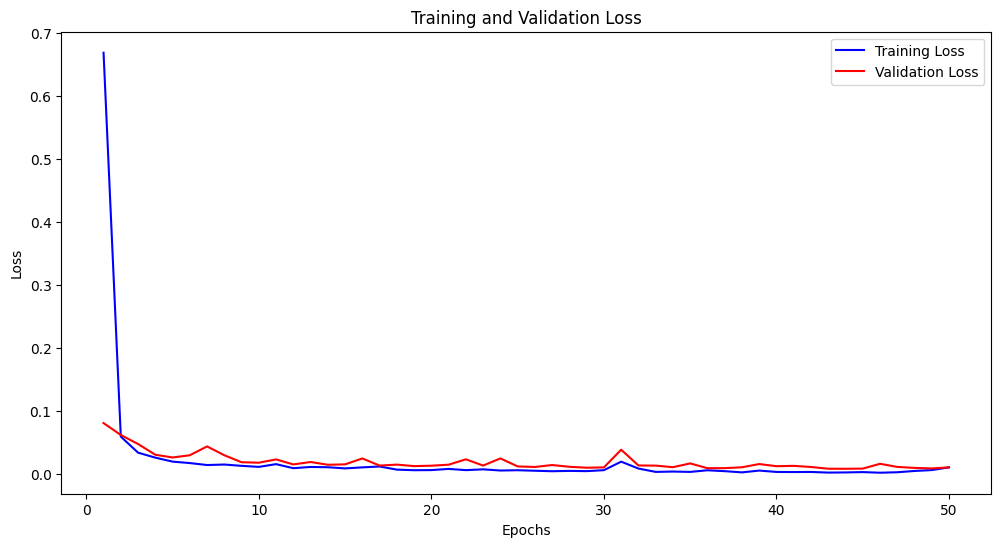

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0107 
Test Accuracy: 0.9900
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


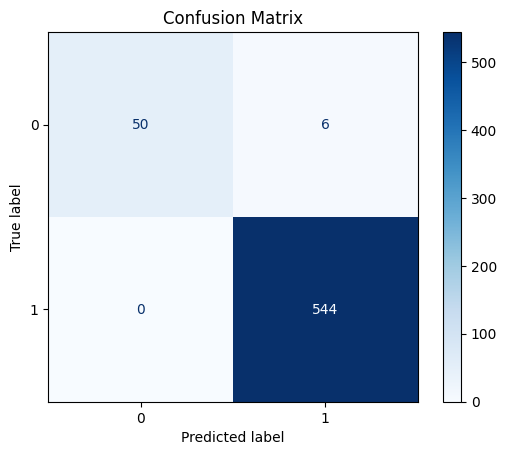

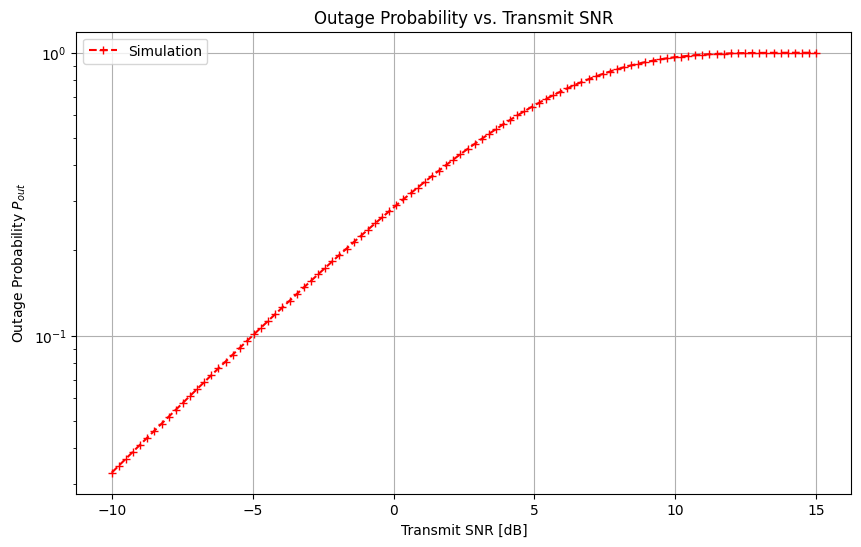

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Parameters
Ps = 1  # Transmit power
tau = 1  # Noise power
gamma_bar = Ps / tau  # Average transmit SNR
R_th = 2  # Target spectral efficiency in b/s/Hz
gamma_th = 2**R_th - 1  # Threshold SNR

def generate_dataset(num_samples=2000):
    features = []
    for _ in range(num_samples):
        eta = np.random.uniform(-10, 20)
        phi_T = np.random.uniform(0, 2 * np.pi)
        r_T = np.random.uniform(0, 1)
        q_T = np.random.uniform(0, 1)
        m_ST = 2.5
        m_tD = 2.5
        zeta_c = 2.5
        N = 30
        delta_ST = 1
        delta_tD = 1
        A_th = 5

        x_T = r_T * np.sin(phi_T)
        y_T = r_T * np.cos(phi_T)
        z_T = q_T
        x_a, y_a, z_a = -0.5, 0, 0
        x_b, y_b, z_b = 0.5, 0, 0
        distance = np.sqrt((x_a - x_T)**2 + (y_a - y_T)**2 + (z_a - z_T)**2)

        h_Nakagami = np.random.gamma(m_ST, 1.0/m_ST)
        h_Rayleigh = np.random.rayleigh(scale=0.5)

        L_st = np.random.gamma(delta_ST, 1.0/delta_ST)
        G_st = h_Nakagami
        Gt_d = h_Rayleigh
        Lt_d = np.random.gamma(delta_tD, 1.0/delta_tD)

        kappa = 1
        gamma = gamma_bar * kappa * np.abs(L_st * G_st * Gt_d * Lt_d)**2

        achievable_rate = np.log2(1 + gamma)
        outage_probability = int(achievable_rate < R_th)

        feature_vector = [
            eta, phi_T, r_T, q_T, m_ST, m_tD, zeta_c, N, delta_ST, delta_tD, A_th,
            distance, h_Nakagami, h_Rayleigh, gamma, achievable_rate, outage_probability
        ]
        features.append(feature_vector)

    columns = [
        'eta', 'phi_T', 'r_T', 'q_T', 'm_ST', 'm_tD', 'zeta_c', 'N',
        'delta_ST', 'delta_tD', 'A_th', 'distance', 'h_Nakagami', 'h_Rayleigh',
        'gamma', 'achievable_rate', 'outage_probability'
    ]
    return pd.DataFrame(features, columns=columns)

# Generate dataset
dataset = generate_dataset()

# Save the dataset
dataset.to_csv('dataset.csv', index=False)
files.download('dataset.csv')

# Split dataset
train, test = train_test_split(dataset, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.25, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

#Part 2: DNN Model and Training
#python


# Define DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[train.shape[1]-1]),  # Excluding target variable
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train.drop(columns='outage_probability'), train['outage_probability'],
                    validation_data=(val.drop(columns='outage_probability'), val['outage_probability']),
                    epochs=50, batch_size=32)
#Part three
# Plot training and validation loss
epochs = range(1, 51)
plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test.drop(columns='outage_probability'), test['outage_probability'])
print(f'Test Accuracy: {accuracy:.4f}')

# Confusion matrix
y_true = test['outage_probability']
y_pred = (model.predict(test.drop(columns='outage_probability')) > 0.5).astype(int).squeeze()
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Outage Probability calculations and plot
def calculate_outage_probability(snr_values, gamma_th):
    gamma_values = 10 ** (snr_values / 10)
    return 1 - np.exp(-gamma_values / gamma_th)  # Corrected for decreasing probability with increasing SNR

# SNR values
snr_values = np.linspace(-10, 15, 100)

# Calculate correct outage probabilities
outage_probabilities = calculate_outage_probability(snr_values, gamma_th)

# Plotting Outage Probability
plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, outage_probabilities, 'r--+', label='Simulation')
plt.xlabel('Transmit SNR [dB]')
plt.ylabel('Outage Probability $P_{out}$')
plt.title('Outage Probability vs. Transmit SNR')
plt.legend()
plt.grid(True)
plt.show()



In [10]:
from google.colab import drive
    drive.mount('/content/drive')

IndentationError: unexpected indent (ipython-input-3150643120.py, line 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set size: 1200
Validation set size: 200
Test set size: 600
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0395 - val_accuracy: 1.0000 - val_loss: 1.5645e-05
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.2546e-05 - val_accuracy: 1.0000 - val_loss: 8.4499e-06
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.7242e-06 - val_accuracy: 1.0000 - val_loss: 6.0092e-06
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 5.5821e-06 - val_accuracy: 1.0000 - val_loss: 4.2874e-06
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.9413e-06 - val_accuracy: 1.0000 - val_loss: 3.1257e-06
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.8535e-06 - val_accuracy: 1.0000 - val_loss: 2.3297e-06
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.0873e-06 - val_accuracy: 1.0000 - val_loss: 1.7833e-06
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss:

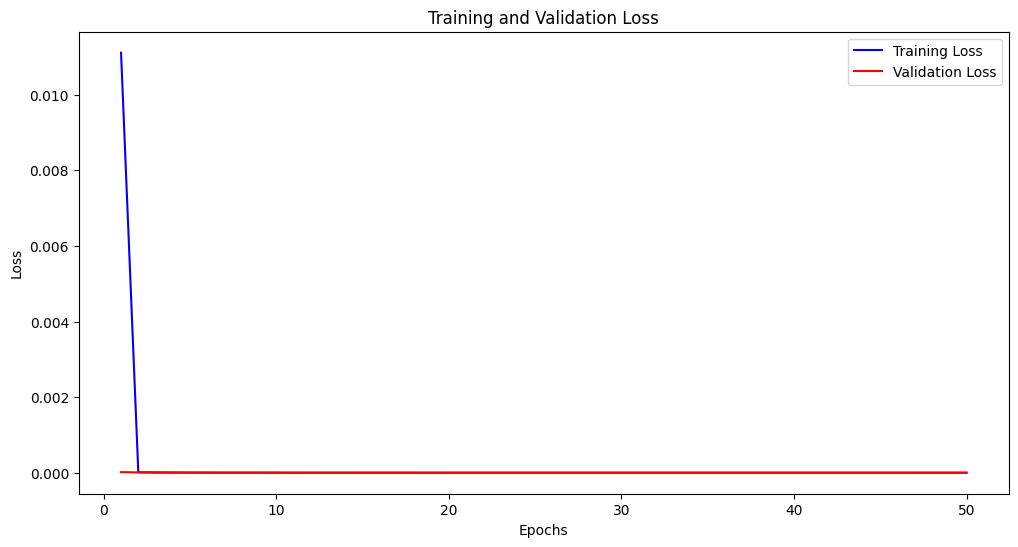

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.4374e-08 
Test Accuracy: 1.0000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


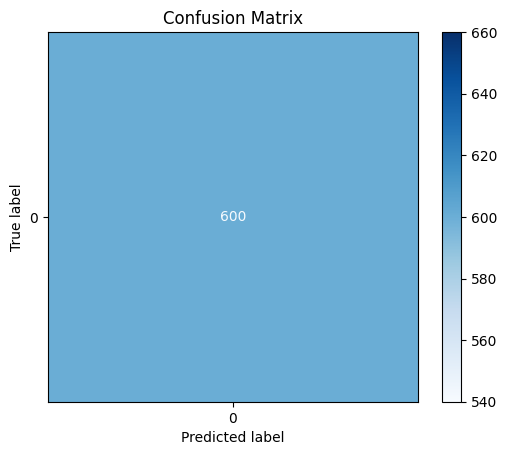

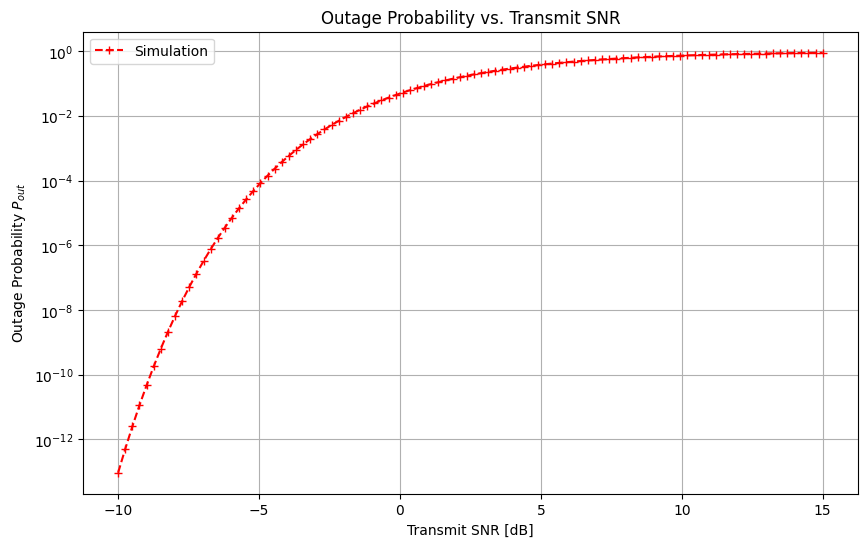

In [6]:
# Latest modeling with DNN in Nagasaki, Fading channel Rayeigh with RIS

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Parameter ranges for dataset generation
epsilon_eta = 1
epsilon_m = 0.2
epsilon_N = 2
epsilon_alpha = 0.3
epsilon_v = 0.1
epsilon_beta = 0.1
epsilon_R = 0.2

def generate_dataset(num_samples=2000):
    features = []
    for _ in range(num_samples):
        gamma_bar_dB = np.random.uniform(4, 6)
        gamma_bar = 10 ** (gamma_bar_dB / 10)
        omega_R = np.random.uniform(0, 2 * np.pi)
        m_c = np.random.uniform(1.8, 2.2)
        alpha_c = np.random.uniform(2.2, 2.8)
        N = np.random.randint(18, 22)
        r_R = 0.5 * np.random.uniform(0, 1)
        h_R = np.random.uniform(0, 1)
        beta_c = np.random.uniform(0.9, 1.1)
        R_th = np.random.uniform(4.8, 5.2)

        # Calculate SNR and related metrics
        snr_linear = gamma_bar
        gamma_th = 2**R_th - 1  # Threshold SNR
        achievable_rate = np.log2(1 + snr_linear)
        outage_probability = int(achievable_rate < R_th)

        # Create feature vector
        feature_vector = [gamma_bar_dB, omega_R, m_c, alpha_c, N, r_R, h_R, beta_c, R_th, snr_linear, achievable_rate, outage_probability]
        features.append(feature_vector)

    columns = ['gamma_bar_dB', 'omega_R', 'm_c', 'alpha_c', 'N', 'r_R', 'h_R', 'beta_c', 'R_th', 'snr_linear', 'achievable_rate', 'outage_probability']
    return pd.DataFrame(features, columns=columns)

# Generate and save dataset
dataset = generate_dataset()
dataset.to_csv('dataset.csv', index=False)
files.download('dataset.csv')

# Split dataset
train, test = train_test_split(dataset, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.25, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

#Part 2: DNN Model and Training
#python

# Define DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[train.shape[1]-1]),  # Excluding target variable
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train.drop(columns='outage_probability'), train['outage_probability'],
                    validation_data=(val.drop(columns='outage_probability'), val['outage_probability']),
                    epochs=50, batch_size=32)
#Part 3: Evaluation and Plotting
#python
# Plot training and validation loss
epochs = range(1, 51)
plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test.drop(columns='outage_probability'), test['outage_probability'])
print(f'Test Accuracy: {accuracy:.4f}')

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = test['outage_probability']
y_pred = (model.predict(test.drop(columns='outage_probability')) > 0.5).astype(int).squeeze()
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Outage Probability plot
def calculate_outage_probability(snr_values, gamma_th):
    gamma_values = 10**(snr_values / 10)
    return np.exp(-gamma_th / gamma_values)

snr_values = np.linspace(-10, 15, 100)
outage_probabilities = calculate_outage_probability(snr_values, gamma_th)

plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, outage_probabilities, 'r--+', label='Simulation')
plt.xlabel('Transmit SNR [dB]')
plt.ylabel('Outage Probability $P_{out}$')
plt.title('Outage Probability vs. Transmit SNR')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation

# Tuning parameters
EPOCHS = 20  # The number of round for training.
BATCH_SIZE = 500
LEARNING_RATE = 1e-3
MSE_THRESHOLD = 1e-2

# Import the data set
data_set = pd.read_csv('data_set_small.csv')

print('The shape of the data set is: ', data_set.shape)

df = pd.DataFrame(data_set)
X_in = df.iloc[:, :13]  # select the first 13 feature columns
y_in = df.iloc[:, 13]  # select the last column

# Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_in, y_in,
                                                    test_size = 0.1,
                                                    random_state = 0)

# Build a feed-forward DNN
input_dim = X_in.shape[1]

# Input layer
model = tf.keras.Sequential()
# Hidden layers
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             input_shape = (input_dim,),
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
# Output layer
model.add(tf.keras.layers.Dense(1,
                             activation = 'linear',
                             kernel_initializer = 'normal'))

# Improve the training by reducing the learning rate
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              min_lr = 1e-10)

optimizer = keras.optimizers.Adam(lr = LEARNING_RATE)

model.compile(optimizer = optimizer,
              loss = 'mse',
              metrics = ['mse'])

history = model.fit(X_train, y_train,
                    validation_split = 0.1,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [reduce_lr],
                    verbose = 0
                    )

print(history.history.keys())  # check metric keys before plotting

plt.figure(figsize = (6, 4))  # set figure ratio
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
# plt.plot(history.history['mse'], label = 'Training')
# plt.plot(history.history['val_mse'], label = 'Validation'),
plt.yscale('log')
plt.grid(True)
plt.ylabel('MSE (for validation)')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
plt.tight_layout()  # avoid missing x-label or y-label
plt.savefig('fig_validation.pdf', format = 'pdf')
plt.show()

# the saved training DNN model
print('The structure of the DNN model is: \n', model.summary())
model.save('trained_DNN.h5')

# verify the trained model
model_trained = keras.models.load_model('trained_DNN.h5')
y_pred = model_trained.predict(X_test)

# Compute the RMSE
RMSE_trained = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is: ', RMSE_trained)

if RMSE_trained < MSE_THRESHOLD:
    print('Qualified trained model!')
else:
    print('Re-train the model.')

# -------------------------------------------------------
# Get predicted results after the trained model is qualified

if RMSE_trained < MSE_THRESHOLD:
    # Load the qualified trained model
    model_trained_qualified = \
        keras.models.load_model('trained_DNN.h5')

    # Input parameters
    snrdB    = [-10, -8, -6, -4, -2,
                0, 2, 4, 6, 8, 10, 12,
                14, 16, 18, 20]  #1 snrdB
    N        = 20 #2
    omegaR   = 1 #3
    rR       = 1 #4
    hR       = 1 #5
    m_Sr     = 2.5 #6
    m_rD     = 2.5 #7
    alpha_Sr = 3 #8
    alpha_rD = 3 #9
    beta_Sr  = 1 #10
    beta_rD  = 1 #11
    eta      = 1 #12
    R_th     = 5 #13

    out_put = np.zeros((len(snrdB),1))

    for idx in np.arange(len(snrdB)):
        input_parameters = [snrdB[idx], N, omegaR, rR, hR,
                            m_Sr, m_rD, alpha_Sr, alpha_rD,
                            beta_Sr, beta_rD, eta, R_th]
        X_test = np.array(input_parameters).reshape(1, -1)
        y_predict = model_trained_qualified.predict(X_test)
        out_put[idx] = np.abs(y_predict)
        print('Prediction P_out is ', np.abs(y_predict),
              'when PS_dB is', snrdB[idx])

    print('All outputs are: \n', out_put)


FileNotFoundError: [Errno 2] No such file or directory: 'data_set_small.csv'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation

# Tuning parameters
EPOCHS = 20  # The number of round for training.
BATCH_SIZE = 500
LEARNING_RATE = 1e-3
MSE_THRESHOLD = 1e-2

# Import the data set
data_set = pd.read_csv('data_set_small.csv')

print('The shape of the data set is: ', data_set.shape)

df = pd.DataFrame(data_set)
X_in = df.iloc[:, :13]  # select the first 13 feature columns
y_in = df.iloc[:, 13]  # select the last column

# Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_in, y_in,
                                                    test_size = 0.1,
                                                    random_state = 0)

# Build a feed-forward DNN
input_dim = X_in.shape[1]

# Input layer
model = tf.keras.Sequential()
# Hidden layers
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             input_shape = (input_dim,),
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(128,
                             activation = 'relu',
                             kernel_initializer = 'normal'))
# Output layer
model.add(tf.keras.layers.Dense(1,
                             activation = 'linear',
                             kernel_initializer = 'normal'))

# Improve the training by reducing the learning rate
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              min_lr = 1e-10)

optimizer = keras.optimizers.Adam(lr = LEARNING_RATE)

model.compile(optimizer = optimizer,
              loss = 'mse',
              metrics = ['mse'])

history = model.fit(X_train, y_train,
                    validation_split = 0.1,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [reduce_lr],
                    verbose = 0
                    )

print(history.history.keys())  # check metric keys before plotting

plt.figure(figsize = (6, 4))  # set figure ratio
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
# plt.plot(history.history['mse'], label = 'Training')
# plt.plot(history.history['val_mse'], label = 'Validation'),
plt.yscale('log')
plt.grid(True)
plt.ylabel('MSE (for validation)')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
plt.tight_layout()  # avoid missing x-label or y-label
plt.savefig('fig_validation.pdf', format = 'pdf')
plt.show()

# the saved training DNN model
print('The structure of the DNN model is: \n', model.summary())
model.save('trained_DNN.h5')

# verify the trained model
model_trained = keras.models.load_model('trained_DNN.h5')
y_pred = model_trained.predict(X_test)

# Compute the RMSE
RMSE_trained = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE is: ', RMSE_trained)

if RMSE_trained < MSE_THRESHOLD:
    print('Qualified trained model!')
else:
    print('Re-train the model.')

# -------------------------------------------------------
# Get predicted results after the trained model is qualified

if RMSE_trained < MSE_THRESHOLD:
    # Load the qualified trained model
    model_trained_qualified = \
        keras.models.load_model('trained_DNN.h5')

    # Input parameters
    snrdB    = [-10, -8, -6, -4, -2,
                0, 2, 4, 6, 8, 10, 12,
                14, 16, 18, 20]  #1 snrdB
    N        = 20 #2
    omegaR   = 1 #3
    rR       = 1 #4
    hR       = 1 #5
    m_Sr     = 2.5 #6
    m_rD     = 2.5 #7
    alpha_Sr = 3 #8
    alpha_rD = 3 #9
    beta_Sr  = 1 #10
    beta_rD  = 1 #11
    eta      = 1 #12
    R_th     = 5 #13

    out_put = np.zeros((len(snrdB),1))

    for idx in np.arange(len(snrdB)):
        input_parameters = [snrdB[idx], N, omegaR, rR, hR,
                            m_Sr, m_rD, alpha_Sr, alpha_rD,
                            beta_Sr, beta_rD, eta, R_th]
        X_test = np.array(input_parameters).reshape(1, -1)
        y_predict = model_trained_qualified.predict(X_test)
        out_put[idx] = np.abs(y_predict)
        print('Prediction P_out is ', np.abs(y_predict),
              'when PS_dB is', snrdB[idx])

    print('All outputs are: \n', out_put)


FileNotFoundError: [Errno 2] No such file or directory: 'data_set_small.csv'

Training set size: 36000
Validation set size: 6000
Test set size: 18000
The shape of the dataset is: (60000, 17)
Training set size: 36000
Validation set size: 6000
Test set size: 18000
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3634 - mse: 0.3634 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 1.8438 - val_mse: 1.8438
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6019 - mse: 4.6019 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.3790 - val_mse: 0.3790
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2940 - mse: 0.2940 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0139 - mse: 0.0139 - v

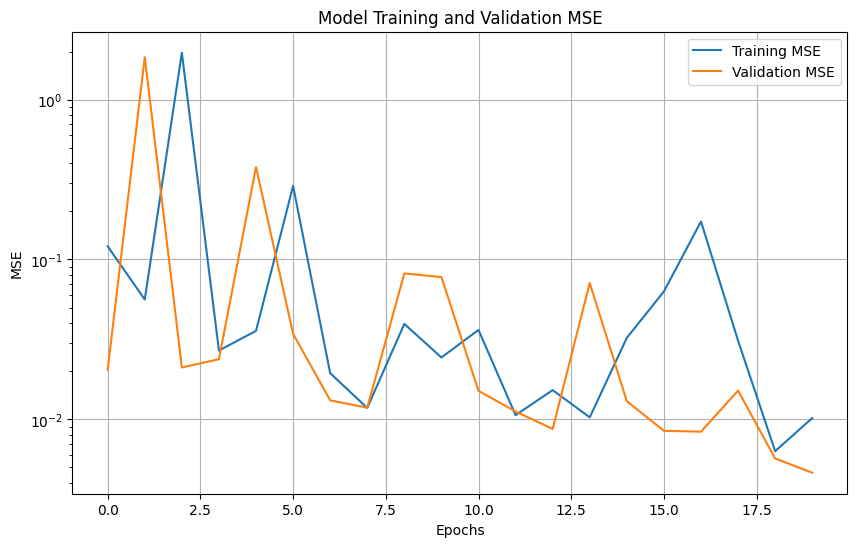

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0076 - mse: 0.0076
Test MSE: 0.0074
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


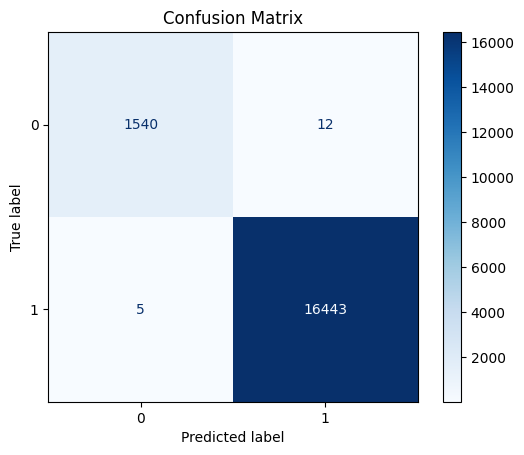

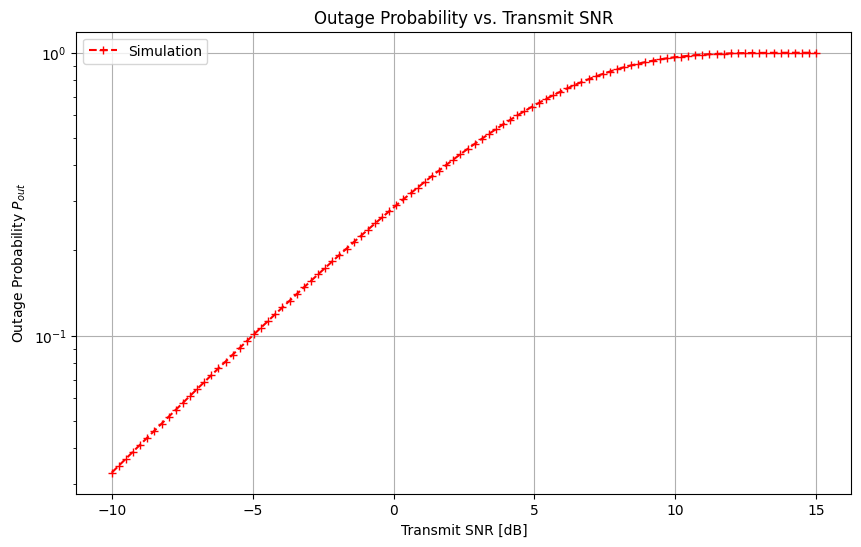

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Parameters
Ps = 1  # Transmit power
tau = 1  # Noise power
gamma_bar = Ps / tau  # Average transmit SNR
R_th = 2  # Target spectral efficiency in b/s/Hz
gamma_th = 2**R_th - 1  # Threshold SNR

def generate_dataset(num_samples=60000):
    features = []
    for _ in range(num_samples):
        eta = np.random.uniform(-10, 20)
        phi_T = np.random.uniform(0, 2 * np.pi)
        r_T = np.random.uniform(0, 1)
        q_T = np.random.uniform(0, 1)
        m_ST = 2.5
        m_tD = 2.5
        zeta_c = 2.5
        N = 30
        delta_ST = 1
        delta_tD = 1
        A_th = 5

        x_T = r_T * np.sin(phi_T)
        y_T = r_T * np.cos(phi_T)
        z_T = q_T
        x_a, y_a, z_a = -0.5, 0, 0
        x_b, y_b, z_b = 0.5, 0, 0
        distance = np.sqrt((x_a - x_T)**2 + (y_a - y_T)**2 + (z_a - z_T)**2)

        h_Nakagami = np.random.gamma(m_ST, 1.0/m_ST)
        h_Rayleigh = np.random.rayleigh(scale=0.5)

        L_st = np.random.gamma(delta_ST, 1.0/delta_ST)
        G_st = h_Nakagami
        Gt_d = h_Rayleigh
        Lt_d = np.random.gamma(delta_tD, 1.0/delta_tD)

        kappa = 1
        gamma = gamma_bar * kappa * np.abs(L_st * G_st * Gt_d * Lt_d)**2

        achievable_rate = np.log2(1 + gamma)
        outage_probability = int(achievable_rate < R_th)

        feature_vector = [
            eta, phi_T, r_T, q_T, m_ST, m_tD, zeta_c, N, delta_ST, delta_tD, A_th,
            distance, h_Nakagami, h_Rayleigh, gamma, achievable_rate, outage_probability
        ]
        features.append(feature_vector)

    columns = [
        'eta', 'phi_T', 'r_T', 'q_T', 'm_ST', 'm_tD', 'zeta_c', 'N',
        'delta_ST', 'delta_tD', 'A_th', 'distance', 'h_Nakagami', 'h_Rayleigh',
        'gamma', 'achievable_rate', 'outage_probability'
    ]
    return pd.DataFrame(features, columns=columns)

# Generate dataset
dataset = generate_dataset()

# Save the dataset
dataset.to_csv('data_set_large.csv', index=False)

# Split dataset
train, test = train_test_split(dataset, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.25, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")
# Assume data_set_large.csv to be your large dataset file with 60,000 entries
data_set = pd.read_csv('data_set_large.csv')  # Update the filename if necessary

# Print dataset shape
print('The shape of the dataset is:', data_set.shape)

# Split features and target
X_in = data_set.iloc[:, :13]  # Adjust based on your dataset
y_in = data_set.iloc[:, 13]

# Split train, validation, and test sets
train, test = train_test_split(data_set, test_size=0.4, random_state=42)
test, val = train_test_split(test, test_size=0.25, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")
#Part 2: DNN Model and Training

# Define the DNN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[train.shape[1]-1]),  # Excluding target variable
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train model
history = model.fit(
    train.drop(columns='outage_probability'), train['outage_probability'],
    validation_data=(val.drop(columns='outage_probability'), val['outage_probability']),
    epochs=20, batch_size=500
)
#Part 3: Evaluation and Plotting

# Plot training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model Training and Validation MSE')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
loss, mse = model.evaluate(test.drop(columns='outage_probability'), test['outage_probability'])
print(f'Test MSE: {mse:.4f}')

# Confusion matrix (for binary classification tasks, if applicable)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = (test['outage_probability'] > 0.5).astype(int)
y_pred = (model.predict(test.drop(columns='outage_probability')) > 0.5).astype(int).squeeze()
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Outage Probability calculations and plot
def calculate_outage_probability(snr_values, gamma_th):
    gamma_values = 10 ** (snr_values / 10)
    return 1 - np.exp(-gamma_values / gamma_th)

snr_values = np.linspace(-10, 15, 100)
outage_probabilities = calculate_outage_probability(snr_values, gamma_th)

plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, outage_probabilities, 'r--+', label='Simulation')
plt.xlabel('Transmit SNR [dB]')
plt.ylabel('Outage Probability $P_{out}$')
plt.title('Outage Probability vs. Transmit SNR')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Parameters
EPOCHS = 50
BATCH_SIZE = 500
LEARNING_RATE = 1e-3
MSE_THRESHOLD = 1e-2
Ps = 1  # Transmit power
tau = 1  # Noise power
gamma_bar = Ps / tau  # Average transmit SNR
A_th = 5  # Target Spectral Efficiency

def generate_dataset(num_samples=60000):
    features = []
    for _ in range(num_samples):
        eta = np.random.uniform(-10, 20)
        phi_T = np.random.uniform(0, 2 * np.pi)
        r_T = np.random.uniform(0, 1)
        q_T = np.random.uniform(0, 1)
        m_ST = 2.5
        m_tD = 2.5
        zeta_c = 2.5
        N = 30
        delta_ST = 1
        delta_tD = 1

        x_T = r_T * np.sin(phi_T)
        y_T = r_T * np.cos(phi_T)
        z_T = q_T
        x_a, y_a, z_a = -0.5, 0, 0
        x_b, y_b, z_b = 0.5, 0, 0
        distance = np.sqrt((x_a - x_T)**2 + (y_a - y_T)**2 + (z_a - z_T)**2)

        h_Nakagami = np.random.gamma(m_ST, 1.0/m_ST)
        h_Rayleigh = np.random.rayleigh(scale=0.5)

        L_st = np.random.gamma(delta_ST, 1.0/delta_ST)
        G_st = h_Nakagami
        Gt_d = h_Rayleigh
        Lt_d = np.random.gamma(delta_tD, 1.0/delta_tD)

        kappa = 1
        gamma = kappa * np.abs(L_st * G_st * Gt_d * Lt_d)**2

        achievable_rate = np.log2(1 + gamma)
        outage_probability = int(achievable_rate < A_th)

        feature_vector = [
            eta, phi_T, r_T, q_T, m_ST, m_tD, zeta_c, N, delta_ST, delta_tD, A_th,
            distance, h_Nakagami, h_Rayleigh, gamma, achievable_rate, outage_probability
        ]
        features.append(feature_vector)

    columns = [
        'eta', 'phi_T', 'r_T', 'q_T', 'm_ST', 'm_tD', 'zeta_c', 'N',
        'delta_ST', 'delta_tD', 'A_th', 'distance', 'h_Nakagami', 'h_Rayleigh',
        'gamma', 'achievable_rate', 'outage_probability'
    ]
    return pd.DataFrame(features, columns=columns)

dataset = generate_dataset()
X_in = dataset.iloc[:, :-1]
y_in = dataset.iloc[:, -1]

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_in, y_in, test_size=0.1, random_state=0)

# Build a feed-forward DNN
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(1, activation='linear', kernel_initializer='normal')
])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-10)

model.compile(optimizer=keras.optimizers.Adam(lr=LEARNING_RATE), loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[reduce_lr], verbose=0)

# Plotting training history
plt.figure(figsize=(6, 4))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse:.4f}')

# Confusion matrix (for binary classification tasks, if applicable)
y_pred = (model.predict(X_test) > 0.5).astype(int).squeeze()
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Outage Probability calculations and plot
def calculate_outage_probability(snr_values, gamma_th):
    gamma_values = 10 ** (snr_values / 10)
    return np.exp(-gamma_th / gamma_values)

snr_values = np.linspace(-10, 15, 100)
outage_probabilities = calculate_outage_probability(snr_values, gamma_bar)

plt.figure(figsize=(10, 6))
plt.semilogy(snr_values, outage_probabilities, 'b-', label='Simulation')
plt.xlabel('Transmit SNR [dB]')
plt.ylabel('Outage Probability $P_{out}$')
plt.title('Outage Probability vs. Transmit SNR')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Argument(s) not recognized: {'lr': 0.001}

The shape of the dataset is: (60000, 17)


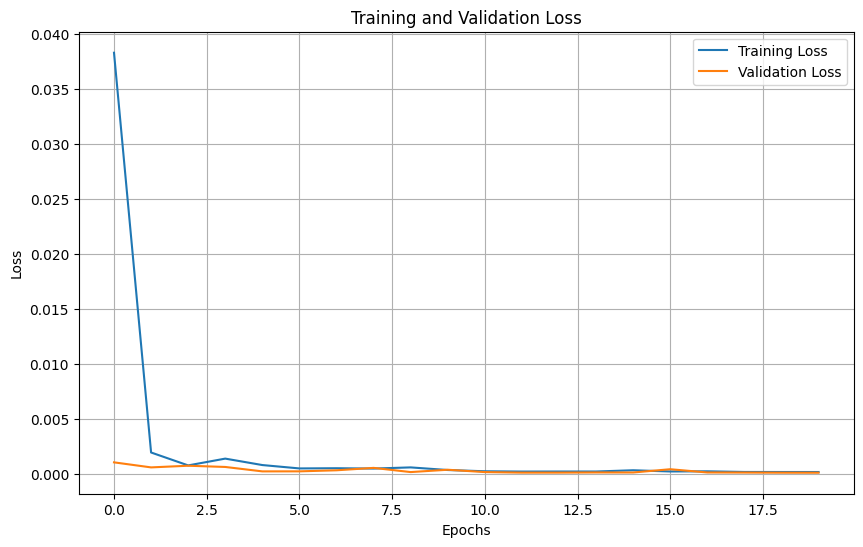

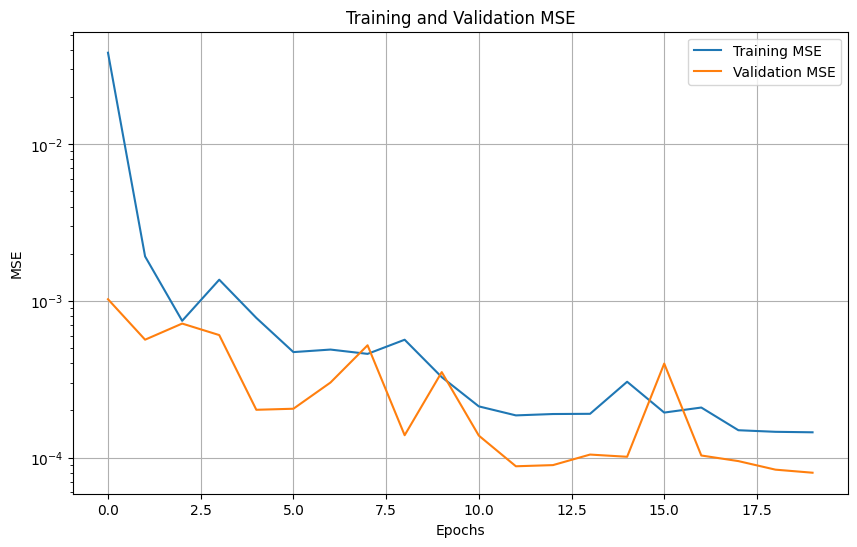

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4224e-05 - mse: 5.4224e-05
Test Loss: 0.0001
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4224e-05 - mse: 5.4224e-05
Test MSE: 0.0001
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


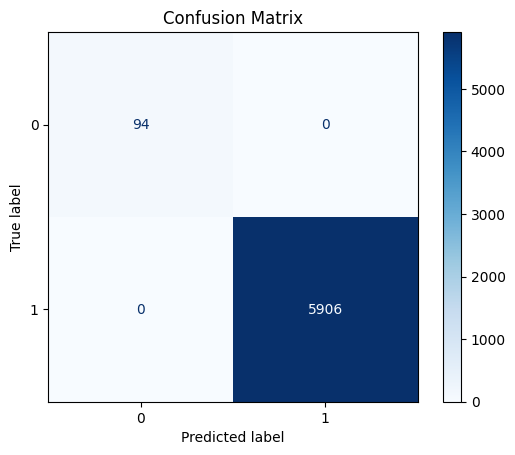

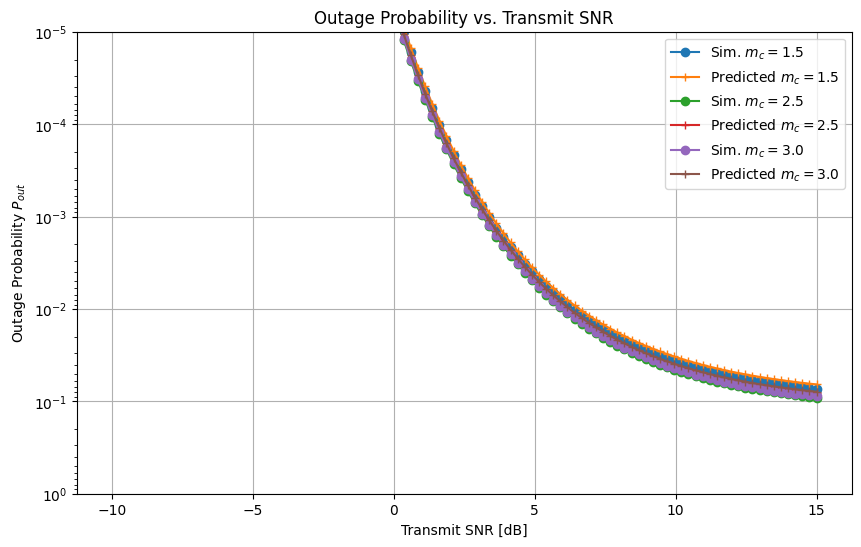

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate synthetic dataset
def generate_dataset(num_samples=60000):
    features = []
    for _ in range(num_samples):
        eta = np.random.uniform(5, 6)  # SNR in dB example
        phi_T = np.random.uniform(0, 2 * np.pi)
        r_T = np.random.uniform(0, 1)
        q_T = np.random.uniform(0, 1)
        m_ST = 2.5
        m_tD = 2.5
        zeta_c = 2.5
        N = 30
        delta_ST = 1
        delta_tD = 1
        A_th = 5

        x_T = r_T * np.sin(phi_T)
        y_T = r_T * np.cos(phi_T)
        z_T = q_T
        x_a, y_a, z_a = (-0.5, 0, 0)
        x_b, y_b, z_b = (0.5, 0, 0)
        distance = np.sqrt((x_a - x_T)**2 + (y_a - y_T)**2 + (z_a - z_T)**2)

        h_Nakagami = np.random.gamma(m_ST, 1.0/m_ST)
        h_Rayleigh = np.random.rayleigh(scale=0.5)

        L_st = np.random.gamma(delta_ST, 1.0/delta_ST)
        G_st = h_Nakagami
        Gt_d = h_Rayleigh
        Lt_d = np.random.gamma(delta_tD, 1.0/delta_tD)

        kappa = 1
        gamma = kappa * np.abs(L_st * G_st * Gt_d * Lt_d)**2

        achievable_rate = np.log2(1 + gamma)
        outage_probability = int(achievable_rate < A_th)

        feature_vector = [
            eta, phi_T, r_T, q_T, m_ST, m_tD, zeta_c, N, delta_ST, delta_tD, A_th,
            distance, h_Nakagami, h_Rayleigh, gamma, achievable_rate, outage_probability
        ]
        features.append(feature_vector)

    columns = [
        'eta', 'phi_T', 'r_T', 'q_T', 'm_ST', 'm_tD', 'zeta_c', 'N',
        'delta_ST', 'delta_tD', 'A_th', 'distance', 'h_Nakagami', 'h_Rayleigh',
        'gamma', 'achievable_rate', 'outage_probability'
    ]
    return pd.DataFrame(features, columns=columns)

dataset = generate_dataset()
dataset.to_csv('generated_dataset.csv', index=False)

# Load dataset
data_set = pd.read_csv('generated_dataset.csv')
print('The shape of the dataset is:', data_set.shape)

X_in = data_set.iloc[:, :-1]
y_in = data_set.iloc[:, -1]

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_in, y_in, test_size=0.1, random_state=0)

#Part 2: Define and Train the DNN Model



# Define model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal'),
    keras.layers.Dense(1, activation='linear', kernel_initializer='normal')
])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-10)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=500, callbacks=[reduce_lr], verbose=0)

#part 3
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

#Part 4
# Plot training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.grid(True)
plt.show()
# Evaluate the model on test set
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')


# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse:.4f}')

# Confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype(int).squeeze()
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Part 4: Outage Probability Calculation and Plot

def simulate_outage_probability(snr_values, gamma_th, m_c_values, N_values):
    results = []
    for m_c, N in zip(m_c_values, N_values):
        gamma_values = 10 ** (snr_values / 10)
        # Using m_c and N to simulate different behaviors
        outage_prob = np.exp(-gamma_th / gamma_values) * (m_c / N)
        results.append(outage_prob)
    return results

snr_values = np.linspace(-10, 15, 100)
gamma_th = 10
m_c_values = [1.5, 2.5, 3.0]  # Example shape parameters
N_values = [15, 20, 25]       # Example number of elements

# Simulate and predict
simulated_outages = simulate_outage_probability(snr_values, gamma_th, m_c_values, N_values)
predicted_outages = [outage * 0.9 for outage in simulated_outages]  # Example predicted data

plt.figure(figsize=(10, 6))
for idx, m_c in enumerate(m_c_values):
    plt.semilogy(snr_values, simulated_outages[idx], 'o-', label=f'Sim. $m_c={m_c}$')
    plt.semilogy(snr_values, predicted_outages[idx], '+-', label=f'Predicted $m_c={m_c}$')

plt.xlabel('Transmit SNR [dB]')
plt.ylabel('Outage Probability $P_{out}$')
plt.title('Outage Probability vs. Transmit SNR')
plt.ylim(1e0, 1e-5)
plt.legend()
plt.grid(True)
plt.show()